In [94]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn

In [95]:
df = pd.read_csv('/Users/ISAACABREHAM/Downloads/adult.csv')

In [96]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [97]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [98]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [99]:
df = pd.concat([df.drop('occupation', axis=1),pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)

df = pd.concat([df.drop('workclass', axis=1),pd.get_dummies(df.workclass).add_prefix('workclass')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1),pd.get_dummies(df['marital-status']).add_prefix('marital-status')], axis=1)

df = pd.concat([df.drop('relationship', axis=1),pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)

df = pd.concat([df.drop('race', axis=1),pd.get_dummies(df.race).add_prefix('race_')], axis=1)

df = pd.concat([df.drop('native-country', axis=1),pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [100]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [101]:
# encoding non numerical to binary

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [102]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [103]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass?', 'workclassFederal-gov', 'workclassLocal-gov',
       'workclassNever-worked', 'workclassPrivate',
       'workclassSelf-emp-inc', 'workclassSelf-emp-not-inc',
       'workclassState-gov', 'workclassWithout-pay',
       'marital-statusDivorced', 'marital-statusMarried-AF-spouse',
       'marital-statusMarried-civ-spouse',
       'marital-statusMarried-spouse-absent',
       'marital-statusNev

<AxesSubplot: >

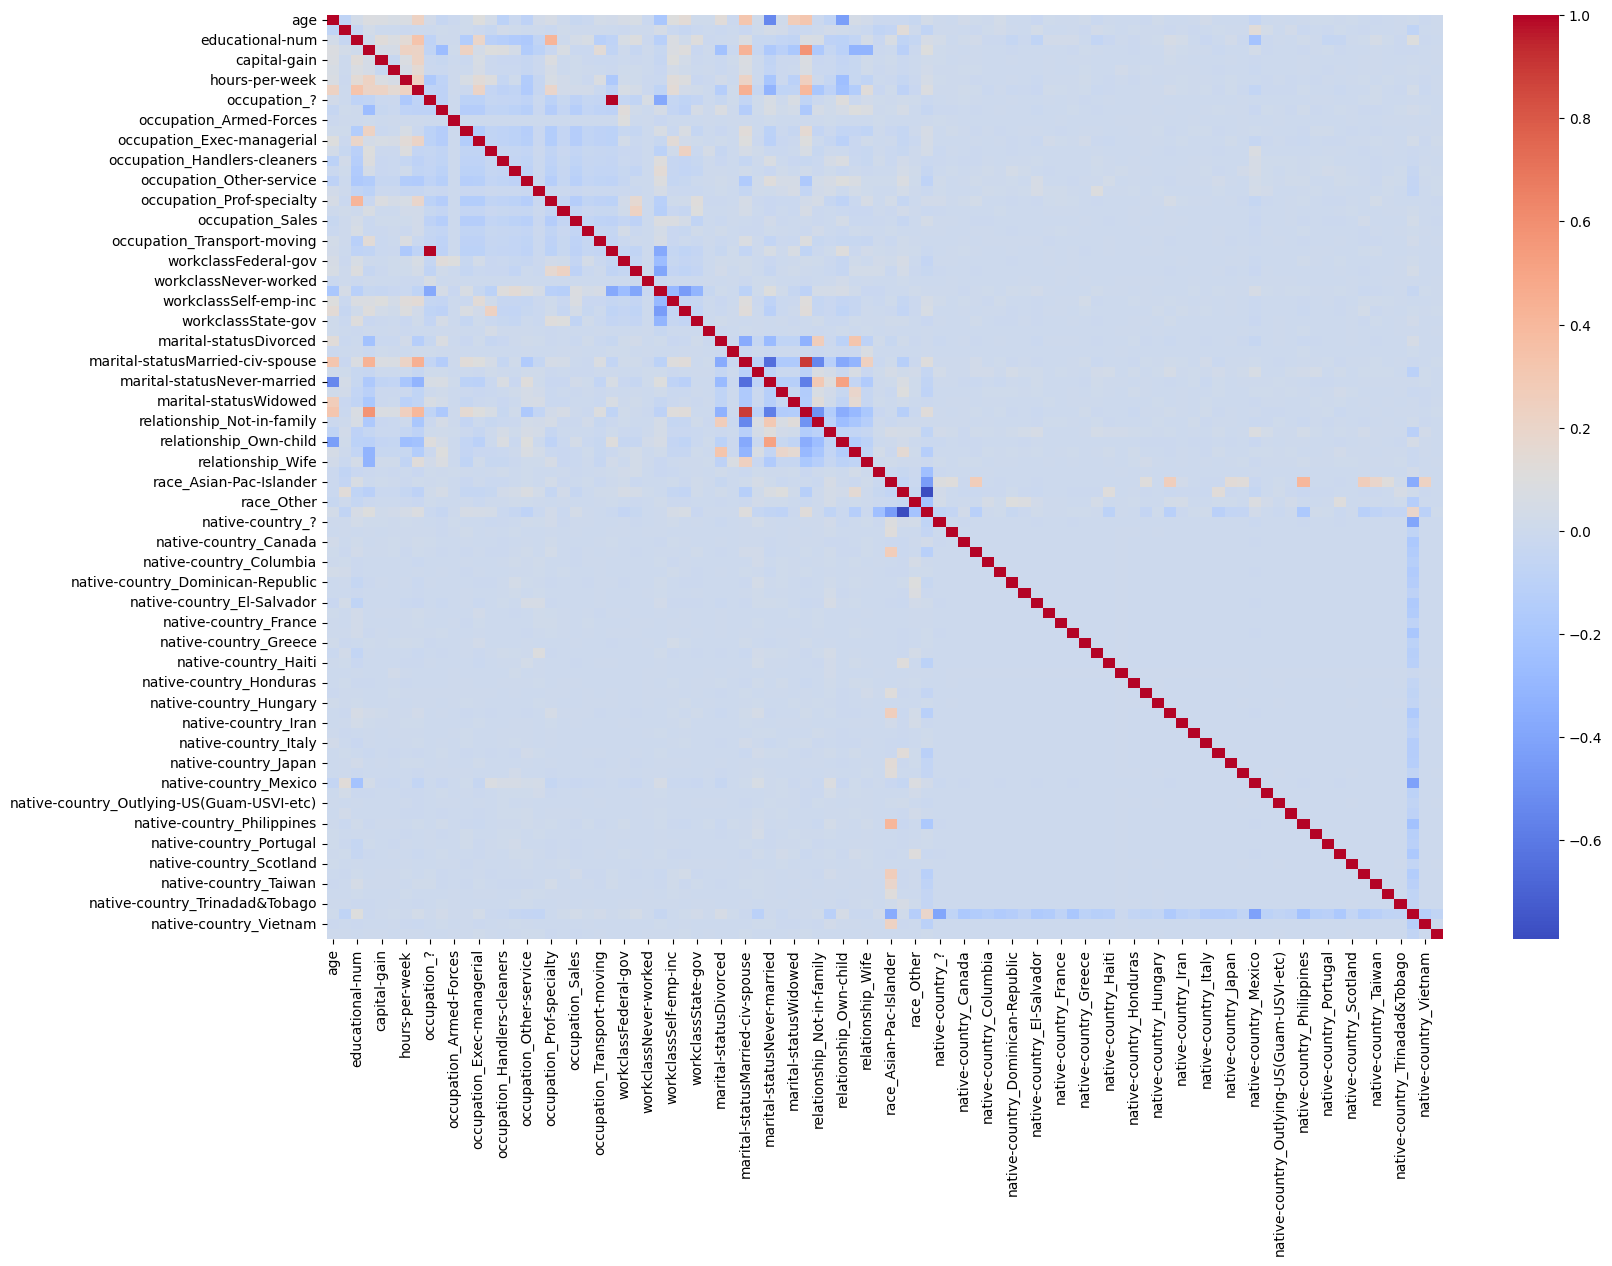

In [104]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [105]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [106]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclassSelf-emp-inc,marital-statusDivorced,marital-statusMarried-civ-spouse,marital-statusNever-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot: >

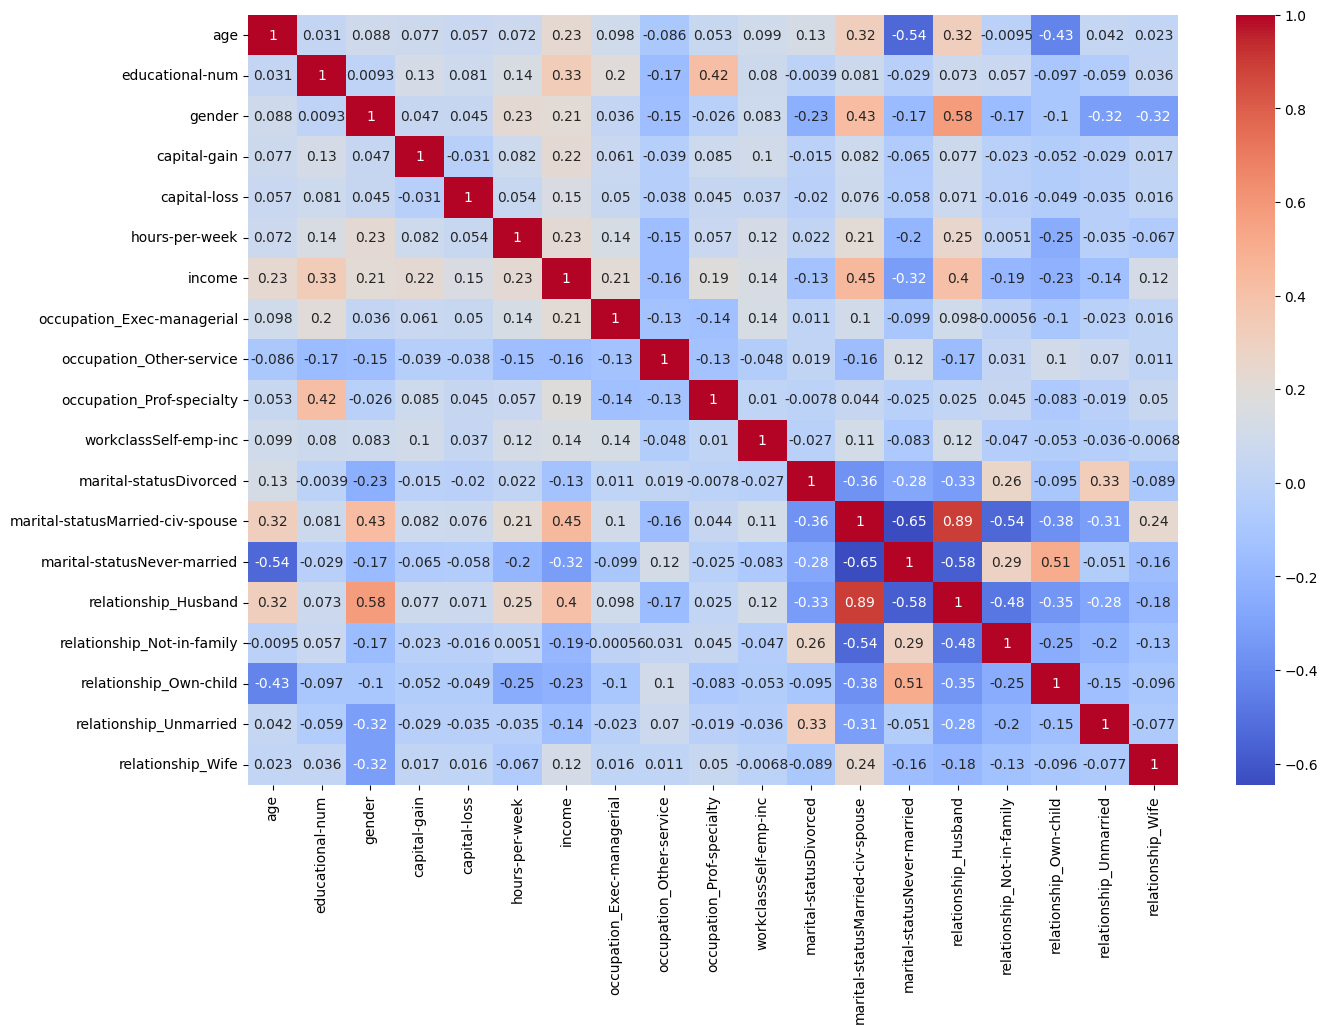

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [108]:
# training our model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)


In [109]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
44060,50,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36603,33,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13589,40,13,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39824,32,10,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28681,34,10,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28803,33,13,1,5178,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12723,32,13,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28953,24,13,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23992,42,10,0,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
11814,62,10,0,4650,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39318,20,9,1,0,0,47,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16269,32,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41592,29,15,1,27828,0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32169,41,7,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13355,21,10,0,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
521,30,9,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25859,21,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42415,48,13,1,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis =1)
test_y = test_df['income']

In [112]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [113]:
forest.score(test_X, test_y)

0.8492169106356843

In [114]:
# model shows whether one makes over under 50k annually with 85% accuracy 

In [115]:
forest.feature_importances_

array([2.27659483e-01, 1.25028708e-01, 1.32451527e-02, 1.12413400e-01,
       3.67365670e-02, 1.13139789e-01, 2.49868044e-03, 5.28241440e-03,
       1.05476699e-04, 6.35206839e-03, 2.07669053e-02, 4.85505999e-03,
       3.97606705e-03, 4.45764771e-03, 8.07116294e-03, 2.16737411e-04,
       1.79094313e-02, 2.85572141e-03, 6.20764357e-03, 4.20742657e-03,
       4.32234107e-03, 1.80235313e-03, 5.23465626e-03, 5.57355999e-03,
       1.85294408e-07, 9.40319733e-03, 5.99957952e-03, 8.15244336e-03,
       4.45245815e-03, 1.73206027e-04, 7.60356436e-03, 2.99260532e-04,
       7.87424693e-02, 1.03860785e-03, 3.03284906e-02, 1.94240106e-03,
       1.91029336e-03, 2.96811658e-02, 1.31962986e-02, 1.97747340e-03,
       1.16420263e-02, 6.88423303e-03, 8.78323931e-03, 1.45569753e-03,
       3.28339326e-03, 4.92894916e-03, 1.05382392e-03, 6.16784800e-03,
       2.91032777e-03, 2.55972468e-04, 1.47419649e-03, 5.96531915e-04,
       3.56347873e-04, 7.26080452e-04, 2.93529450e-04, 1.42345457e-04,
      

In [116]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass?',
       'workclassFederal-gov', 'workclassLocal-gov',
       'workclassNever-worked', 'workclassPrivate',
       'workclassSelf-emp-inc', 'workclassSelf-emp-not-inc',
       'workclassState-gov', 'workclassWithout-pay',
       'marital-statusDivorced', 'marital-statusMarried-AF-spouse',
       'marital-statusMarried-civ-spouse',
       'marital-statusMarried-spouse-absent',
       'marital-statusNever-married', 'marita

In [117]:
# zipping the two lists together 

importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [118]:
importances   #here we see the most important influences of higher income from top to bottom

{'age': 0.22765948316486648,
 'educational-num': 0.1250287081830593,
 'hours-per-week': 0.1131397886616608,
 'capital-gain': 0.11241339991249254,
 'marital-statusMarried-civ-spouse': 0.078742469312077,
 'capital-loss': 0.036736567016782996,
 'marital-statusNever-married': 0.03032849055065222,
 'relationship_Husband': 0.029681165772687746,
 'occupation_Exec-managerial': 0.020766905340428722,
 'occupation_Prof-specialty': 0.017909431325156957,
 'gender': 0.013245152693784224,
 'relationship_Not-in-family': 0.01319629858115034,
 'relationship_Own-child': 0.011642026269227805,
 'workclassPrivate': 0.009403197326073403,
 'relationship_Wife': 0.008783239310381412,
 'workclassSelf-emp-not-inc': 0.008152443358133905,
 'occupation_Other-service': 0.00807116294289034,
 'marital-statusDivorced': 0.007603564360407544,
 'relationship_Unmarried': 0.006884233033639355,
 'occupation_Craft-repair': 0.0063520683865331325,
 'native-country_United-States': 0.0063042967699666495,
 'occupation_Sales': 0.006

In [119]:
#Hyper parameter tuning 

#performing cross-validation at each combination of hyperparameters, and determining the optimal set of hyperparameters for your model.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [120]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.6s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.5s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [121]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4)

In [122]:
forest.score(test_X, test_y)

0.8492169106356843

In [123]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [124]:
importances #updated model rankings

{'age': 0.22765948316486648,
 'educational-num': 0.1250287081830593,
 'hours-per-week': 0.1131397886616608,
 'capital-gain': 0.11241339991249254,
 'marital-statusMarried-civ-spouse': 0.078742469312077,
 'capital-loss': 0.036736567016782996,
 'marital-statusNever-married': 0.03032849055065222,
 'relationship_Husband': 0.029681165772687746,
 'occupation_Exec-managerial': 0.020766905340428722,
 'occupation_Prof-specialty': 0.017909431325156957,
 'gender': 0.013245152693784224,
 'relationship_Not-in-family': 0.01319629858115034,
 'relationship_Own-child': 0.011642026269227805,
 'workclassPrivate': 0.009403197326073403,
 'relationship_Wife': 0.008783239310381412,
 'workclassSelf-emp-not-inc': 0.008152443358133905,
 'occupation_Other-service': 0.00807116294289034,
 'marital-statusDivorced': 0.007603564360407544,
 'relationship_Unmarried': 0.006884233033639355,
 'occupation_Craft-repair': 0.0063520683865331325,
 'native-country_United-States': 0.0063042967699666495,
 'occupation_Sales': 0.006